In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix


In [ ]:
# Load the dataset
file_path = 'heart.csv'
data = pd.read_csv(file_path)


In [ ]:
# Display the first few rows
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Check for missing values and dataset information
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
# Check statistical summary of the numerical features
print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0

In [ ]:
# Check target distribution
print("\nTarget Distribution:")
print(data['target'].value_counts())


Target Distribution:
target
1    526
0    499
Name: count, dtype: int64


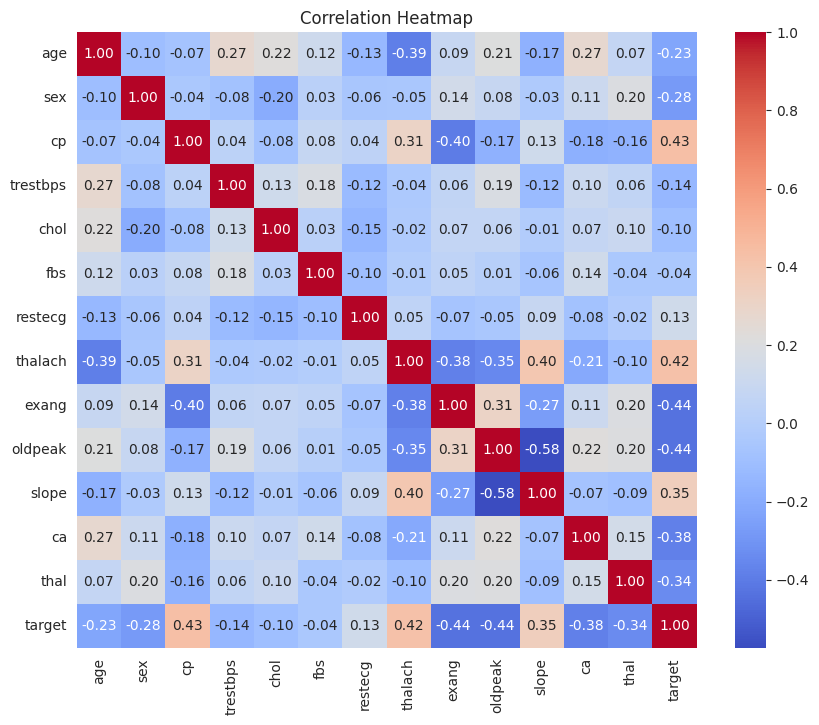

In [ ]:
#Data Visualization
#a.correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


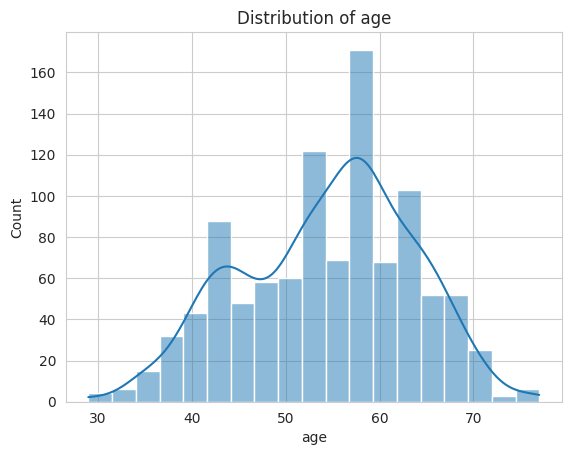

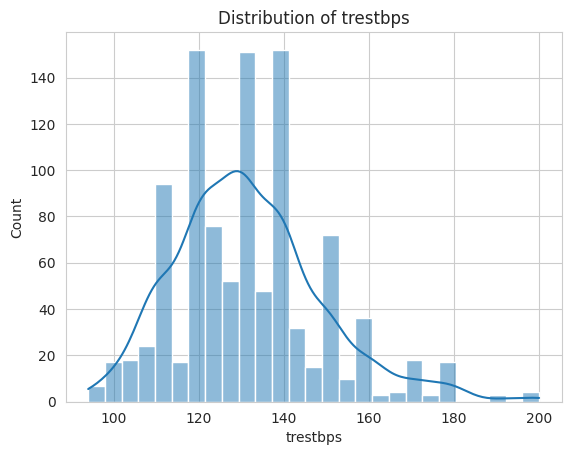

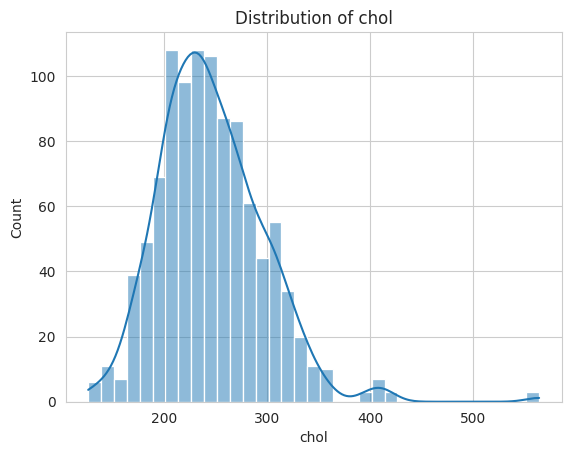

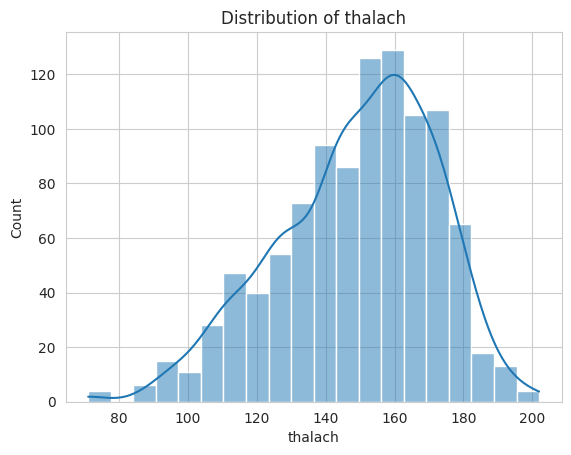

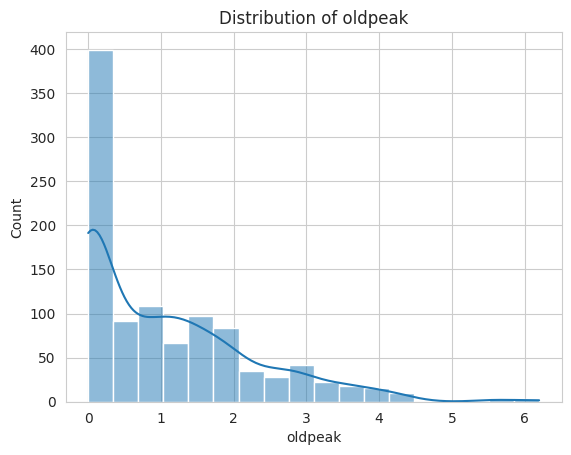

In [ ]:
#b. Distribution of Numerical Features
# Plot distributions for key features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure()
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


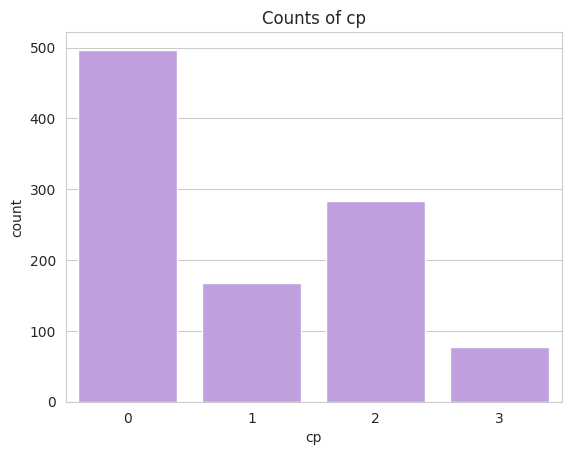

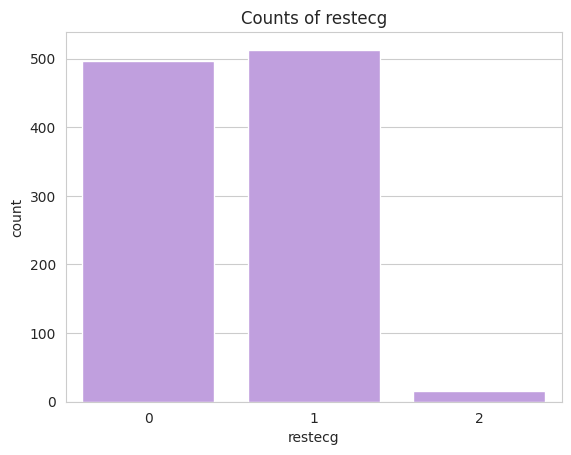

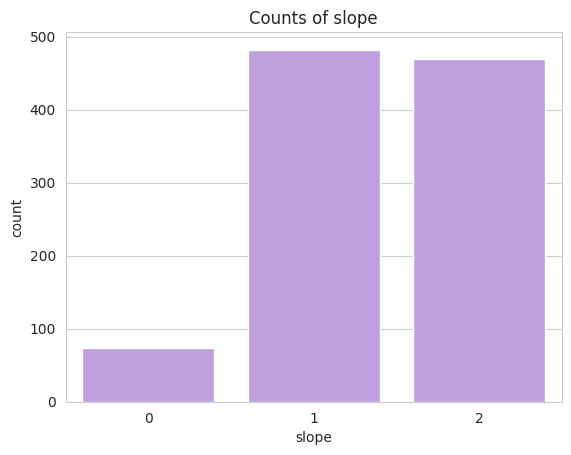

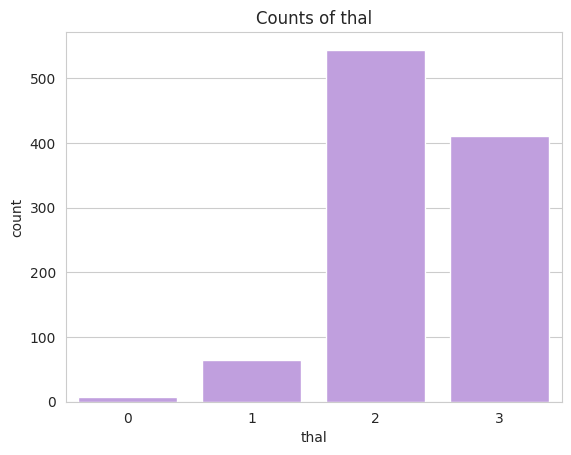

In [ ]:
#c. Bar Plot for Categorical Features
categorical_features = ['cp', 'restecg', 'slope', 'thal']
for feature in categorical_features:
    plt.figure()
    sns.countplot(x=data[feature],color='#c095e8')
    plt.title(f'Counts of {feature}')
    plt.show()


In [ ]:
#4. Data preprocessing
#a. Handle Missing Values
# Fill missing values in 'ca' and 'thal' (if any)
data['ca'] = data['ca'].fillna(data['ca'].median())
data['thal'] = data['thal'].fillna(data['thal'].mode()[0])


In [ ]:
#b. Encode Categorical Features
# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


In [ ]:
#c. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])


In [ ]:
#d. Split the Dataset
# Split data into features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (820, 19)
Testing Set Size: (205, 19)


In [ ]:
#5. Train Ensemble Models
#a. Random Forest
# Random Forest Model Training
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [ ]:
# Evaluate on Test Set
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")

Random Forest Test Accuracy: 0.98


In [ ]:
#Gradient Boosting
# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Gradient Boosting Accuracy: 0.97


In [ ]:
#XGBoost
# Train an XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")


XGBoost Accuracy: 0.99


In [ ]:
#6. Evaluate Models
#a. Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [ ]:
#b.Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       102
           1       0.99      0.95      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
#c.XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")

Cross-Validation Accuracy: 0.99


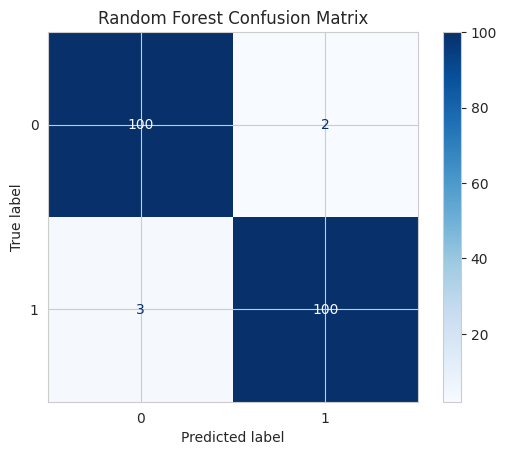

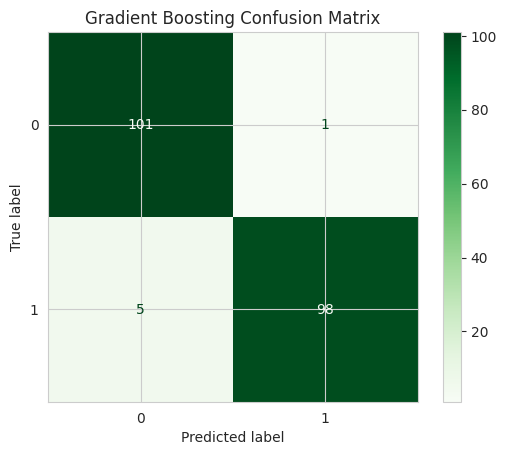

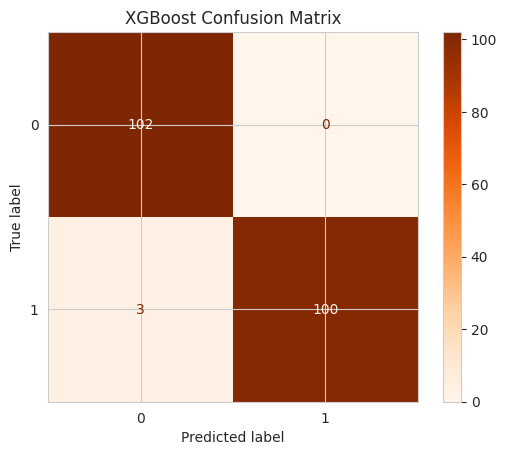

In [ ]:
#b. confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Gradient Boosting Confusion Matrix
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test, cmap='Greens')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# XGBoost Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()


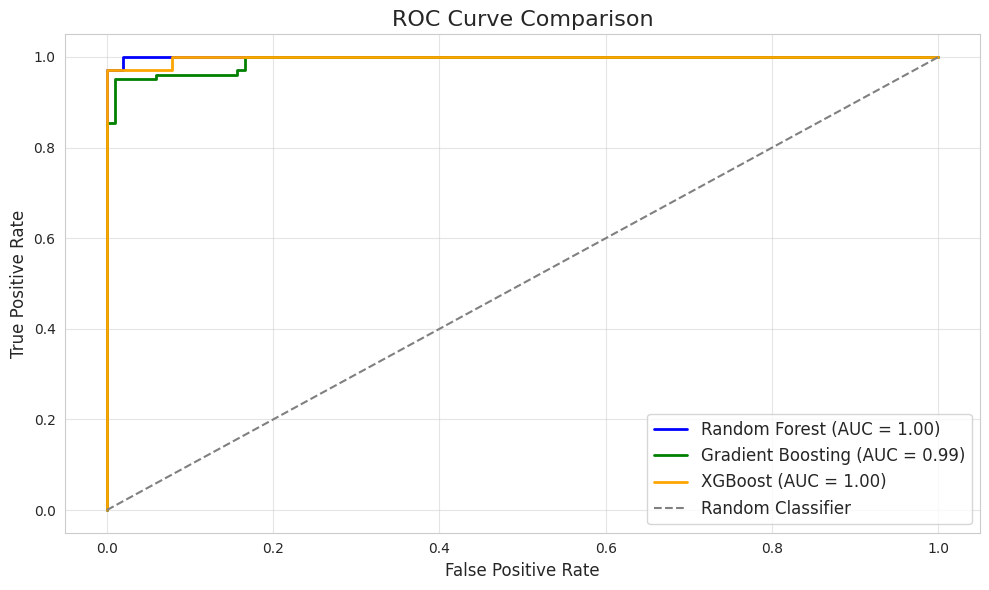

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Random Forest ROC
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Gradient Boosting ROC
gb_probs = gb_model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)

# XGBoost ROC
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)


# Plot ROC Curves
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(gb_fpr, gb_tpr, color='green', lw=2, label=f"Gradient Boosting (AUC = {gb_auc:.2f})")
plt.plot(xgb_fpr, xgb_tpr, color='orange', lw=2, label=f"XGBoost (AUC = {xgb_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")

plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(fontsize=12, loc='lower right')

plt.grid(True, alpha=0.5)
plt.tight_layout()

plt.show()


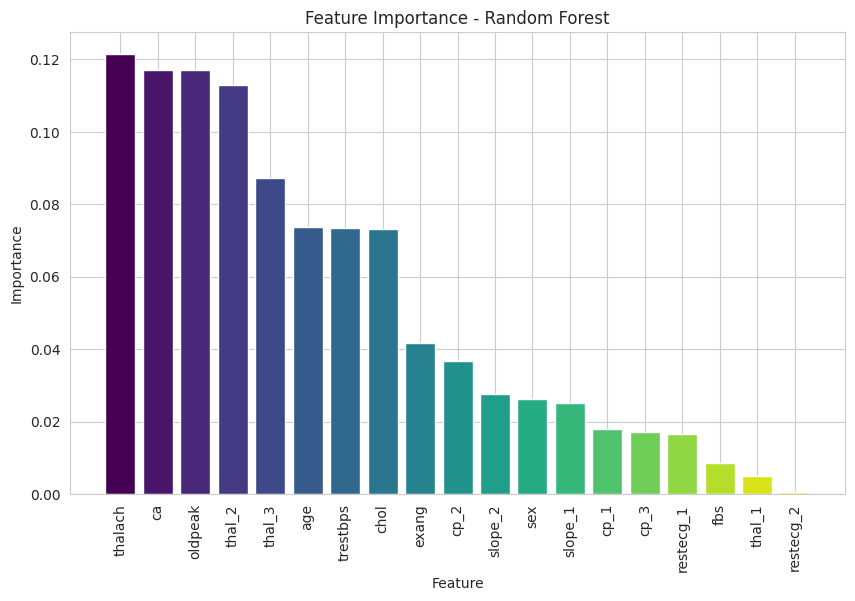

In [ ]:
import matplotlib.cm as cm

# Feature Importance for Random Forest
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]

# Generate colors using a colormap (e.g., 'viridis')
num_features = len(features)
colors = cm.viridis(np.linspace(0, 1, num_features))

# Plot Feature Importance with Colors
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center', color=colors)
plt.xticks(range(len(importances)), features[sorted_indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

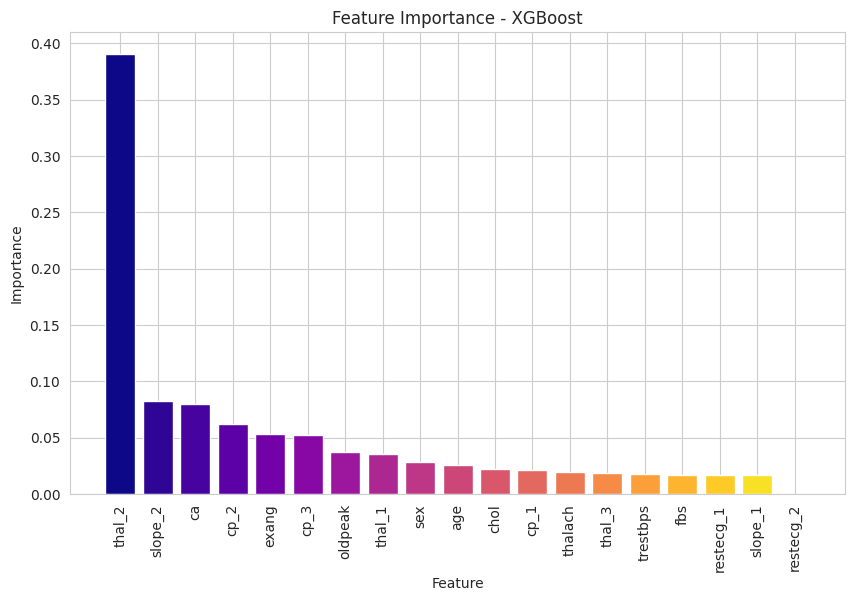

In [ ]:
import matplotlib.cm as cm

# Feature Importance for XGBoost
importances_xgb = xgb_model.feature_importances_
sorted_indices_xgb = np.argsort(importances_xgb)[::-1]

# Generate colors using a colormap (e.g., 'plasma')
num_features_xgb = len(X.columns)
colors_xgb = cm.plasma(np.linspace(0, 1, num_features_xgb))

# Plot Feature Importance with Colors
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_xgb)), importances_xgb[sorted_indices_xgb], align='center', color=colors_xgb)
plt.xticks(range(len(importances_xgb)), X.columns[sorted_indices_xgb], rotation=90)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()